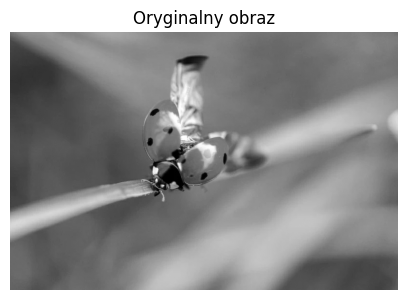

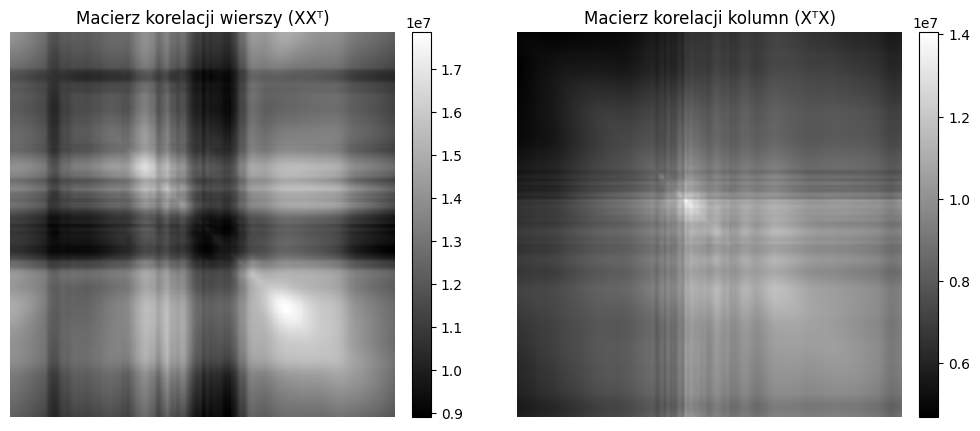

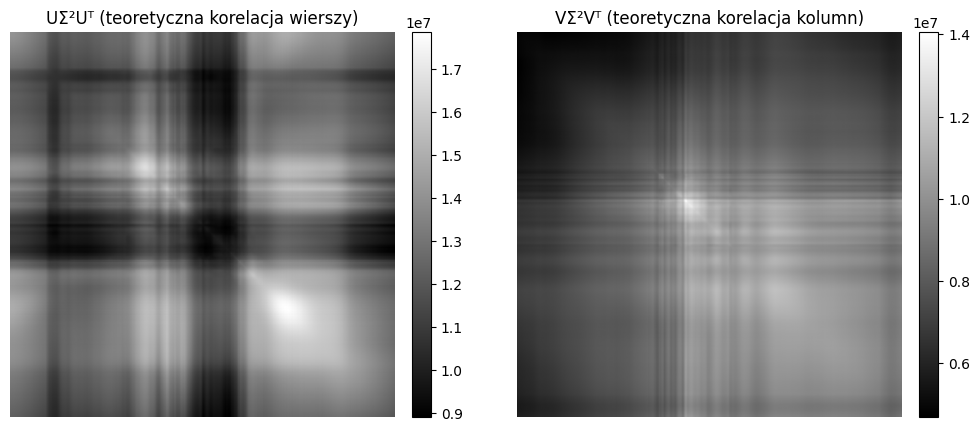

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Wczytaj obraz
A = imread('2.webp')

# Konwersja do skali szarości
X = np.mean(A, axis=-1)

# Wyświetl oryginalny obraz
plt.figure(figsize=(5, 5))
plt.title("Oryginalny obraz")
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()

# Obliczenie rozkładu SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Macierze korelacji
corr_rows = X @ X.T      # korelacja między wierszami
corr_cols = X.T @ X       # korelacja między kolumnami

# Wizualizacja macierzy korelacji
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Macierz korelacji wierszy (XXᵀ)")
plt.imshow(corr_rows, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Macierz korelacji kolumn (XᵀX)")
plt.imshow(corr_cols, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.show()

# Sprawdzenie własności macierzy korelacji
# Powinny zachodzić: XXᵀU = UΣ² oraz XᵀXV = VΣ²
eig_rows = U @ np.diag(S**2) @ U.T
eig_cols = VT.T @ np.diag(S**2) @ VT

# Wizualizacja teoretycznych macierzy z własności SVD
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("UΣ²Uᵀ (teoretyczna korelacja wierszy)")
plt.imshow(eig_rows, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("VΣ²Vᵀ (teoretyczna korelacja kolumn)")
plt.imshow(eig_cols, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.show()